In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [2]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
# Display the data table for preview
pyber_data = city_data.merge(ride_data, on='city')
pyber_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
#create an empty dataframe
pyber_df = pd.DataFrame(columns = [
                                "Average_Fare", 
                                "Total_Number_of_Rides", 
                                "Total_Number_of_Drivers", 
                                  ]
                        )

## Bubble Plot of Ride Sharing Data

In [6]:
#Average Fare ($) Per City
avg_fare = pyber_data.groupby(['type', 'city'])['fare'].mean().round(2)
pyber_df["Average_Fare"] = avg_fare


In [7]:
#Total Number of Rides Per City
tot_num_rides = pyber_data.groupby(['type', 'city'])['ride_id'].sum()
pyber_df["Total_Number_of_Rides"] = tot_num_rides

In [8]:
#Total Number of Drivers Per City
tot_num_drivers = pyber_data.groupby(['type','city'])['driver_count'].count()
pyber_df["Total_Number_of_Drivers"] = tot_num_drivers

In [9]:
pyber_df.head()

Average_Fare  Total_Number_of_Rides  \
type  city                                                  
Rural Bradshawfurt           40.06         37352940220451   
      Garzaport              24.12         17847448587502   
      Harringtonfort         33.47         34358434657936   
      Jessicaport            36.01         21736803740352   
      Lake Jamie             34.36         21353310731781   

                      Total_Number_of_Drivers  
type  city                                     
Rural Bradshawfurt                         10  
      Garzaport                             3  
      Harringtonfort                        6  
      Jessicaport                           6  
      Lake Jamie                            6

In [10]:
Rural_data = pyber_df.loc['Rural',:] #.loc[row or index name,:column name] more than 1 rows or columns needs to be a list
Suburban_data = pyber_df.loc['Suburban',:]
Urban_data = pyber_df.loc['Urban',:]

In [11]:
type(Rural_data)

pandas.core.frame.DataFrame

In [12]:
columns=['Average_Fare', 'Total_Number_of_Rides', 'Total_Number_of_Drivers']

Rural_data = Rural_data.reindex(columns=columns)

Suburban_data = Suburban_data.reindex(columns=columns)

Urban_data = Urban_data.reindex(columns=columns)

Text(0, 0, 'Note: Circle size correlates with driver count per city')

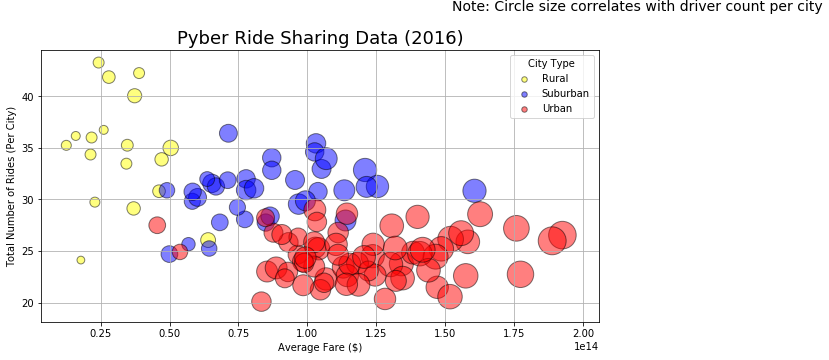

In [13]:
#figure needs to be place before the plotting the graph
plt.figure(figsize=(10,5))

# Obtain the x  = Total_Number_of_Rides and y = Average_Fare coordinates for each of the three city types
r_x_axis_rides = Rural_data['Total_Number_of_Rides']
r_y_axis_rides = Rural_data['Average_Fare']
r_dx = Rural_data['Total_Number_of_Drivers']


# Build the scatter plots for each city type
#There is difference between matplotlib grphs and dataframe graphs
Rural = plt.scatter(
            x= r_x_axis_rides, 
            y= r_y_axis_rides,
            color= 'yellow',
            s= r_dx*20,
            alpha= .5,
            edgecolor='black',
            label= 'Rural'
                )

s_x_axis_rides = Suburban_data['Total_Number_of_Rides']
s_y_axis_rides = Suburban_data['Average_Fare']
s_dx = Suburban_data['Total_Number_of_Drivers']

Suburban = plt.scatter(
            x= s_x_axis_rides, 
            y= s_y_axis_rides,
            color= 'blue',
            s= s_dx*20,
            alpha= .5,
            edgecolor='black',
            label= 'Suburban'
                )

u_x_axis_rides = Urban_data['Total_Number_of_Rides']
u_y_axis_rides = Urban_data['Average_Fare']
u_dx = Urban_data['Total_Number_of_Drivers']

Urban = plt.scatter(
            x= u_x_axis_rides, 
            y= u_y_axis_rides,
            color= 'red',
            s= u_dx*20,
            alpha= .5,
            edgecolor='black',
            label= 'Urban'
                )

# Set our legend to the upper right
lgnd = plt.legend(handles=[Rural, Suburban, Urban], title='City Type', loc="best")
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Add labels to the x and y axes
plt.title("Pyber Ride Sharing Data (2016)", fontsize=18)
plt.xlabel("Average Fare ($)")
plt.ylabel("Total Number of Rides (Per City)")

# Set a grid on the plot
plt.grid()

# Now let's add the additional Note
plt.annotate('Note: Circle size correlates with driver count per city',
            xy=(1.4, 1), xytext=(0, 0),
            xycoords=('axes fraction', 'figure fraction'),
            textcoords='offset points',
            size=14, ha='right', va='top')

## Total Fares by City Type

In [14]:
# Obtain the x  = Total_Number_of_Rides and y = Average_Fare coordinates for each of the three city types

fare_sum_type = pyber_data.groupby('type')['fare'].sum()
fare_sum_tot =  pyber_data['fare'].sum()
fare_percent = fare_sum_type/fare_sum_tot


fare_pie_df = pd.DataFrame(fare_percent)

r = fare_pie_df.loc['Rural',:]

u = fare_pie_df.loc['Urban',:]

s = fare_pie_df.loc['Suburban',:]


In [15]:
# Labels for the sections of our pie chart
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [r, u, s]

# The colors of each section of the pie chart
colors = ["yellow", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

(-1.099702166872965, 1.1191666847887172, -1.2182069289468296, 1.11605238000449)

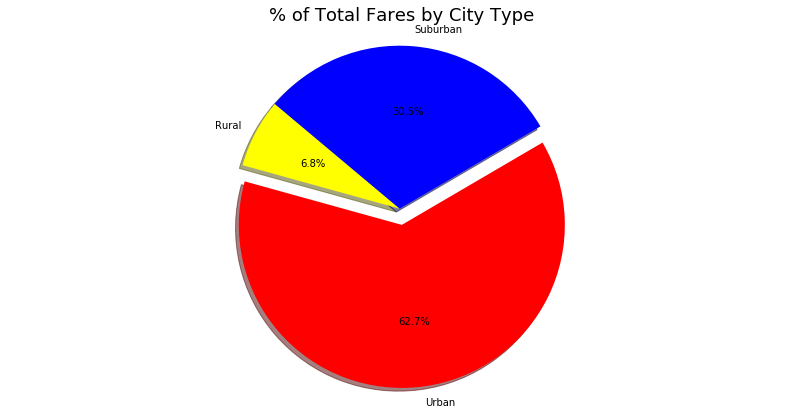

In [16]:
#figure needs to be place before the plotting the graph
plt.figure(figsize=(14,7))

plt.title("% of Total Fares by City Type", fontsize=18)
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

In [17]:
# Save Figure
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/pyber_fare_starter.png")

<Figure size 432x288 with 0 Axes>

## Total Rides by City Type

In [18]:
# Calculate Driver Percents
rides_sum_type = pyber_data.groupby('type')['ride_id'].count()
rides_sum_tot = pyber_data['ride_id'].count()
rides_percent = rides_sum_type/rides_sum_tot


rides_pie_df = pd.DataFrame(rides_percent)

r = rides_pie_df.loc['Rural',:]

u = rides_pie_df.loc['Urban',:]

s = rides_pie_df.loc['Suburban',:]


In [19]:
# Build Pie Charts
# Labels for the sections of our pie chart
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [r, u, s]

# The colors of each section of the pie chart
colors = ["yellow", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

(-1.0965679333004261,
 1.135739274283955,
 -1.2192602031824438,
 1.1112253659935103)

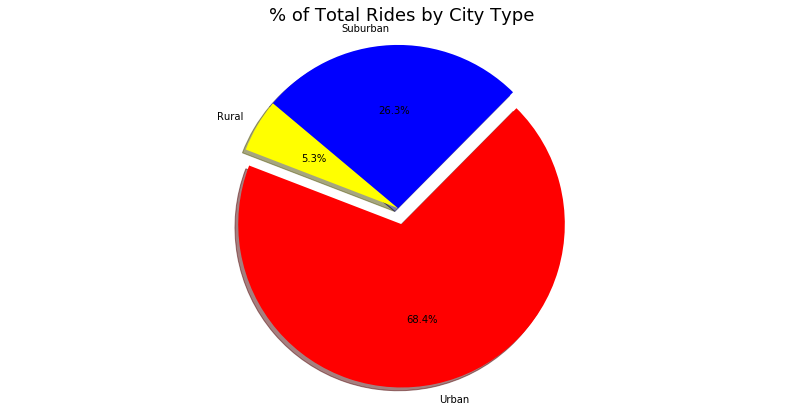

In [20]:
#figure needs to be place before the plotting the graph
plt.figure(figsize=(14,7))

plt.title("% of Total Rides by City Type", fontsize=18)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

In [21]:
# Save Figure
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/pyber_rides_starter.png")

<Figure size 432x288 with 0 Axes>

## Total Drivers by City Type

In [22]:
# Calculate Ride Percents
drivers_sum_type = pyber_data.groupby(['type'])['driver_count'].sum()
drivers_sum_tot = pyber_data['driver_count'].sum()
drivers_percent = drivers_sum_type/ drivers_sum_tot  #drivers_sum_type.sum()

drivers_pie_df = pd.DataFrame(drivers_percent)

r = drivers_pie_df.loc['Rural',:]

u = drivers_pie_df.loc['Urban',:]

s = drivers_pie_df.loc['Suburban',:]

drivers_percent

type
Rural       0.007816
Suburban    0.124729
Urban       0.867456
Name: driver_count, dtype: float64

In [23]:
# Labels for the sections of our pie chart
labels = ["Rural", "Urban", "Suburban"]

# The values of each section of the pie chart
sizes = [r, u, s]

# The colors of each section of the pie chart
colors = ["yellow", "red", "blue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0, 0.1, 0)

(-1.0550966780718345,
 1.152773233122013,
 -1.1970617825071808,
 1.1004785245102586)

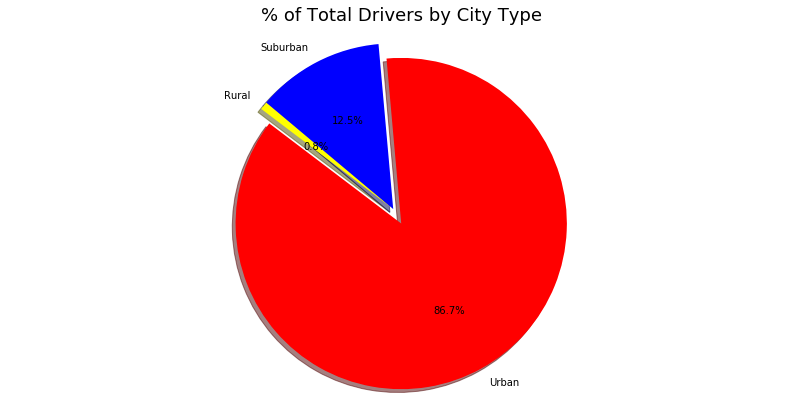

In [24]:
# Build Pie Chart
#figure needs to be place before the plotting the graph
plt.figure(figsize=(14,7))

plt.title("% of Total Drivers by City Type", fontsize=18)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

In [25]:
# Save Figure

# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/pyber_drivers_starter.png")

<Figure size 432x288 with 0 Axes>